Accuracy Score: 0.9319727891156463
R2 Score: 0.675639894086496


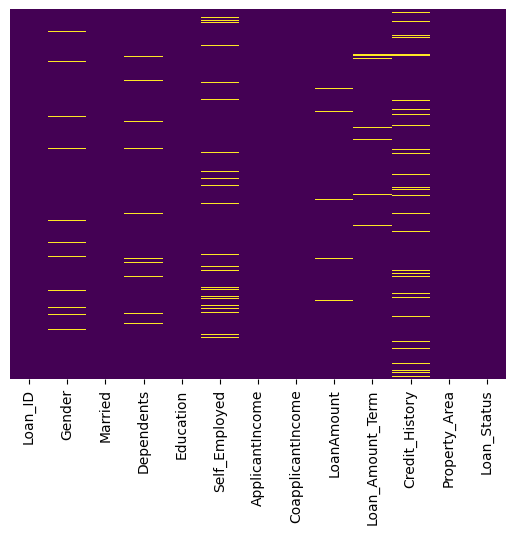

In [3]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

train_path = pd.read_csv("results.csv")

train_path.isnull().sum()

sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

train_path.drop(['Loan_ID'],axis=1,inplace=True)

train_path ['Gender'] = train_path ['Gender'].fillna(train_path['Gender'].mode()[0])
train_path ['Married'] = train_path ['Married'].fillna(train_path['Married'].mode()[0])
train_path ['Dependents'] = train_path ['Dependents'].fillna(train_path['Dependents'].mode()[0])
train_path ['Self_Employed'] = train_path ['Self_Employed'].fillna(train_path['Self_Employed'].mode()[0])
train_path ['LoanAmount'] = train_path ['LoanAmount'].fillna(train_path['LoanAmount'].mean())
train_path ['Loan_Amount_Term'] = train_path ['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mean())
train_path ['Credit_History'] = train_path ['Credit_History'].fillna(train_path['Credit_History'].mean())

train_path.isnull().sum()


label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
  train_path[col] = label_encoder.fit_transform(train_path[col])


x = train_path.drop(['Loan_Status'],axis=1)
y = train_path['Loan_Status']
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42 )

rfc = RandomForestClassifier(n_estimators = 7)

y_pred = rfc.fit(x_train, y_train).predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))  # Not ideal for classification
import pickle

# Save trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)